In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import seaborn as sns

def normalize_by_first(lst):
    # Normalize by the first value
    first = lst[0]
    return list(map(lambda x: 1 + (x - first) / first, lst))

# Set some specs for plotting
%matplotlib inline
mpl.rcParams['figure.figsize'] = (16.0, 8.0)
mpl.style.use('ggplot')
plt.rcParams['font.family'] = 'IPAGothic'

# Read data from the data folder
race_df = pd.read_csv('data/race.csv', low_memory=False, index_col=0)
horse_df = pd.read_csv('data/horse.csv', low_memory=False, index_col=0)
individual_df = pd.read_csv('data/individual.csv', low_memory=False, index_col=0)
trainer_df = pd.read_csv('data/trainer.csv', low_memory=False, index_col=0)
jockey_df = pd.read_csv('data/jockey.csv', low_memory=False, index_col=0)
horse_race_df = pd.read_csv('data/horse_race.csv', low_memory=False, index_col=0)
horse_race_df['age_int'] = horse_race_df['sex_age'].apply(lambda x: re.search(r'\d+', x).group(0)).astype(int)

## Some EDA to be integrated into descriptive analysis notebook 

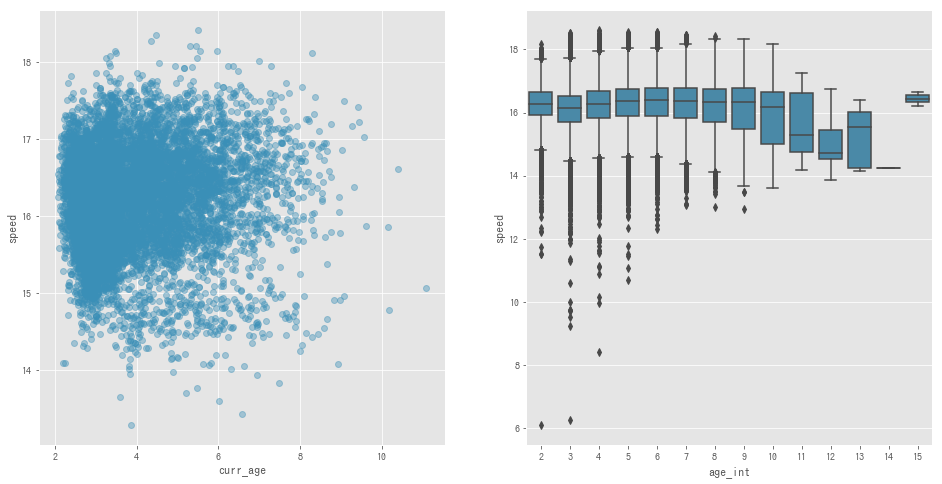

In [25]:
fig, ax = plt.subplots(1, 2)
time_age = horse_race_df.loc[:, ['horse_id', 'run_time', 'distance', 'curr_age', 'age_int']]
time_age['speed'] = time_age['distance'] / time_age['run_time']
sns.regplot(x='curr_age', y='speed', data=time_age.sample(n=10000), fit_reg=False, 
            color='#3A8FB7', ax=ax[0], scatter_kws={'alpha': .4})
sns.boxplot(x='age_int', y='speed', data=time_age, color='#3A8FB7', ax=ax[1])

In [117]:
time_age['speed'] = time_age['speed'].astype(str)
time_age['curr_age'] = time_age['curr_age'].astype(str)
speed_perf = time_age.groupby('horse_id').agg({'curr_age': lambda x: ', '.join(x), 'speed': lambda x: ', '.join(x)})
speed_perf = speed_perf.applymap(lambda x: list(map(lambda y: float(y), x.split(', '))))